In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

if 'notebooks' in os.getcwd():
    os.chdir('..')

In [248]:
data = pd.read_csv("data/prices_round_2_day_0.csv", sep = ';')\
    .set_index("timestamp")

In [249]:
data

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,0,PEARLS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
0,0,COCONUTS,8113,205,NaN,NaN,NaN,NaN,8116,205,NaN,NaN,NaN,NaN,8114.5,0.0
0,0,BANANAS,4893,1,4892.0,30.0,NaN,NaN,4899,30,NaN,NaN,NaN,NaN,4896.0,0.0
0,0,PINA_COLADAS,15225,82,NaN,NaN,NaN,NaN,15228,82,NaN,NaN,NaN,NaN,15226.5,0.0
100,0,COCONUTS,8113,192,NaN,NaN,NaN,NaN,8115,70,8116.0,122.0,NaN,NaN,8114.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999800,0,BANANAS,4869,27,NaN,NaN,NaN,NaN,4876,27,NaN,NaN,NaN,NaN,4872.5,123648.0
999900,0,COCONUTS,8002,190,NaN,NaN,NaN,NaN,8005,190,NaN,NaN,NaN,NaN,8003.5,432688.0
999900,0,PEARLS,9996,2,9995.0,21.0,NaN,NaN,10004,2,10005.0,21.0,NaN,NaN,10000.0,-408.0


In [250]:
coconuts = data.query("product == 'COCONUTS'")
pina_coladas = data.query("product == 'PINA_COLADAS'")

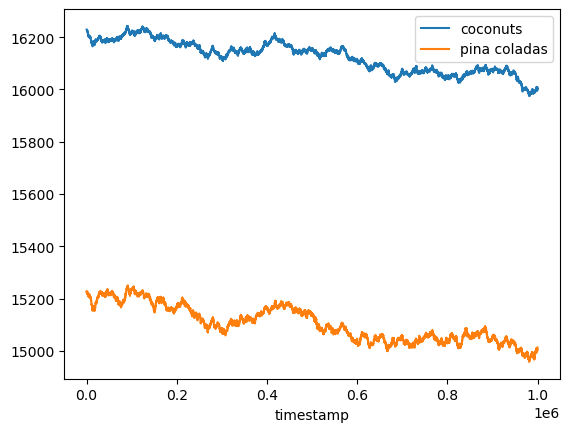

In [251]:
(2*coconuts.mid_price).plot(label = "coconuts")
pina_coladas.mid_price.plot(label = "pina coladas")
plt.legend()

In [252]:
coconuts\
    .mid_price\
    .corr(
        pina_coladas.mid_price
    )

0.9401632732258752

# Verifying spread between coconuts and pina coladas

In [253]:
spread = pina_coladas["mid_price"] - coconuts["mid_price"]  

In [254]:
spread_minus_mean = spread - spread.mean()

## 1st approach- total mean

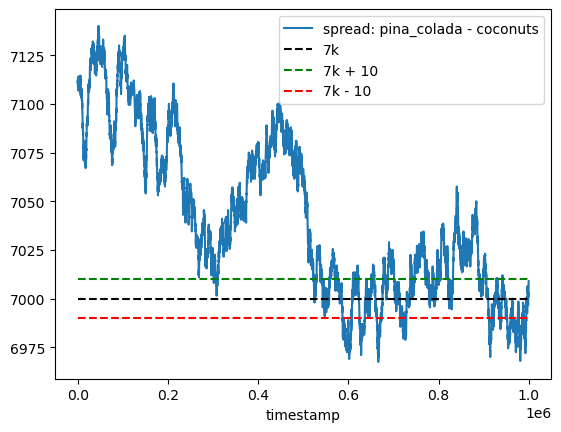

In [255]:
spread.plot(label = "spread: pina_colada - coconuts")
plt.hlines(
    7_000,
    spread.index[0],
    spread.index[-1],
    colors = "black",
    label='7k',
    linestyles="dashed"
)

plt.hlines(
    7_000 +10,
    spread.index[0],
    spread.index[-1],
    colors = "green",
    label='7k + 10',
    linestyles="dashed"
)

plt.hlines(
    7_000 - 10,
    spread.index[0],
    spread.index[-1],
    colors = "red",
    label='7k - 10',
    linestyles="dashed"
)

plt.legend()

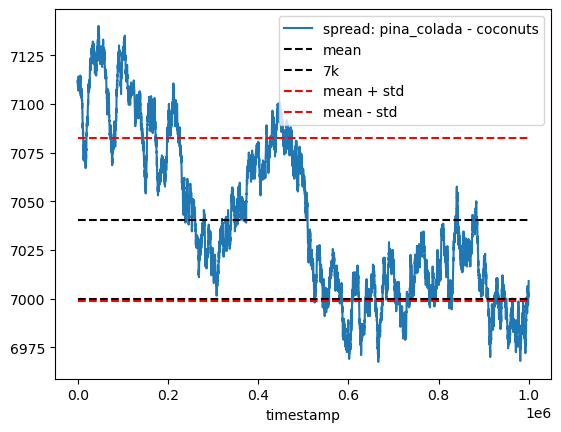

In [256]:
spread.plot(label = "spread: pina_colada - coconuts")
plt.hlines(
    spread.mean(),
    spread.index[0],
    spread.index[-1],
    colors = "black",
    label='mean',
    linestyles="dashed"
)

plt.hlines(
    7_000,
    spread.index[0],
    spread.index[-1],
    colors = "black",
    linestyles="dashed",
    label= "7k"
)

plt.hlines(
    spread.mean() + spread.std(),
    spread.index[0],
    spread.index[-1],
    colors = "red",
    linestyles="dashed",
    label= "mean + std"
)




plt.hlines(
    spread.mean() - spread.std(),
    spread.index[0],
    spread.index[-1],
    colors = "red",
    linestyles="dashed",
    label= "mean - std"
)

plt.legend()

In [257]:
spread.describe()

count    10000.000000
mean      7040.585400
std         41.927414
min       6967.500000
25%       7006.000000
50%       7029.500000
75%       7075.500000
max       7140.000000
Name: mid_price, dtype: float64

## 2nd approach - rolling mean

# Veryfing mean of spread over time

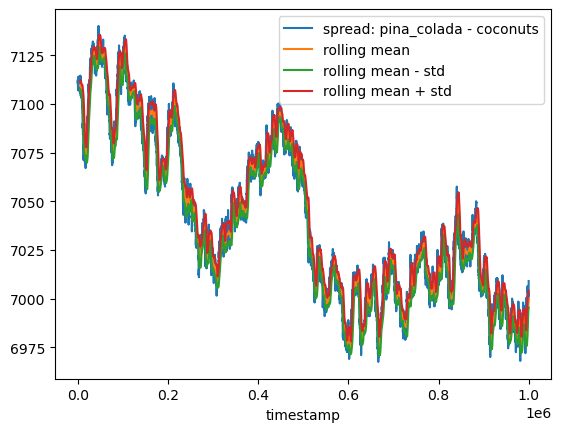

In [258]:
window = 50
spread.plot(label = "spread: pina_colada - coconuts")

avg_rolling_spread = spread.rolling(window)\
    .mean()

mov_spread5 = spread.rolling(5).mean()

rolling_std_spread = spread.rolling(window)\
    .std()

avg_rolling_spread.plot(label = "rolling mean")
(avg_rolling_spread - rolling_std_spread).plot(label = "rolling mean - std")
(avg_rolling_spread + rolling_std_spread).plot(label = "rolling mean + std")

plt.legend()

In [259]:
buy = (mov_spread5 - avg_rolling_spread)/rolling_std_spread < -2.2
sell = (mov_spread5 - avg_rolling_spread)/rolling_std_spread > 2.2

(0.0, 1000000.0)

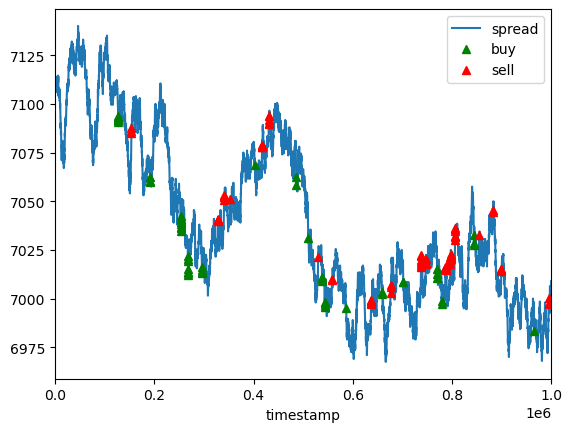

In [260]:
spread.plot(label = 'spread')
spread[buy].plot(
    marker ='^', 
    color ='green', 
    linestyle= 'None',
    label = 'buy'
)
spread[sell].plot(
    marker= '^', 
    color = 'red', 
    linestyle= 'None',
    label = 'sell'
)

plt.legend()
plt.xlim([0, 1e6])

<AxesSubplot:xlabel='timestamp'>

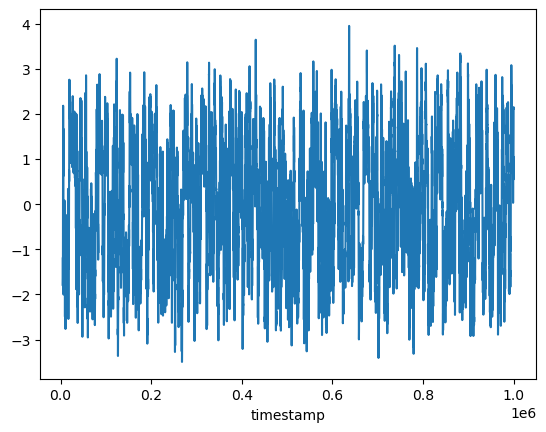

In [261]:
((spread - avg_rolling_spread)/rolling_std_spread)\
    .plot()

In [262]:
avg_rolling_spread

timestamp
0             NaN
100           NaN
200           NaN
300           NaN
400           NaN
           ...   
999500    6998.97
999600    6999.19
999700    6999.34
999800    6999.57
999900    6999.80
Name: mid_price, Length: 10000, dtype: float64

<AxesSubplot:xlabel='timestamp'>

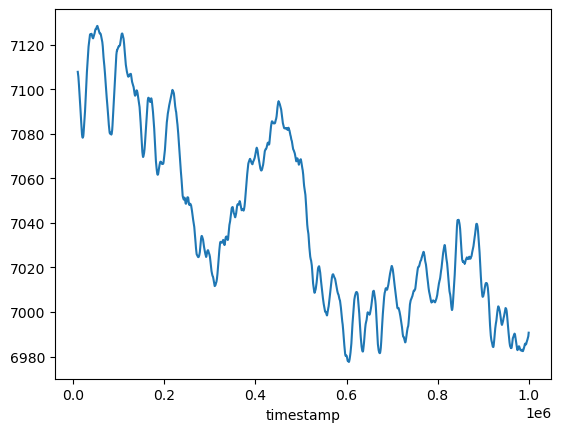

In [263]:
spread.rolling(100)\
    .mean()\
    .plot()

# Liquidity study 

In [264]:
bid_mask_coconuts = coconuts.columns.str.contains("bid_volume")

coconuts[coconuts.columns[bid_mask_coconuts]]\
    .sum(axis=1)\
    .describe()

count    10000.000000
mean       187.347500
std         23.991196
min        101.000000
25%        172.000000
50%        186.000000
75%        201.000000
max        302.000000
dtype: float64

In [265]:
ask_mask_coconuts = coconuts.columns.str.contains("ask_volume")

coconuts[coconuts.columns[ask_mask_coconuts]]\
    .sum(axis=1)\
    .describe()

count    10000.000000
mean       187.123200
std         22.089867
min        140.000000
25%        172.000000
50%        186.000000
75%        200.000000
max        300.000000
dtype: float64

In [266]:
bid_mask_pina_coladas = pina_coladas.columns.str.contains("bid_volume")

pina_coladas[pina_coladas.columns[bid_mask_pina_coladas]]\
    .sum(axis=1)\
    .describe()


count    10000.000000
mean        93.693400
std         11.882883
min         50.000000
25%         86.000000
50%         93.000000
75%        101.000000
max        154.000000
dtype: float64

In [267]:
aks_mask_pina_coladas = pina_coladas.columns.str.contains("bid_volume")

pina_coladas[pina_coladas.columns[ask_mask_coconuts]]\
    .sum(axis=1)\
    .describe()

count    10000.000000
mean        93.948700
std         11.618338
min         70.000000
25%         86.000000
50%         93.000000
75%        101.000000
max        150.000000
dtype: float64

# Verifying prices separately

<AxesSubplot:xlabel='timestamp'>

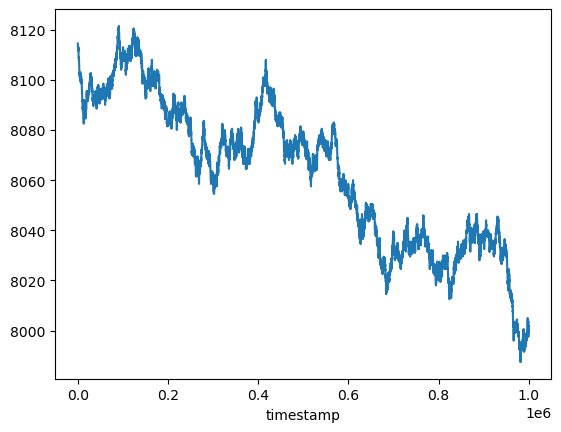

In [268]:
coconuts.mid_price.plot(label = "coconuts")